# 데이터 분석 및 시각화

## 데이터 추가 정리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style('whitegrid')
sns.set_palette('deep')

ad_campaign = pd.read_csv('ad_campaign_cleaned.csv')
ad_campaign.head()

,xyz_campaign_id,age,gender,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,Z,30-34,M,17861,2,1.82,2,0
1,Z,30-34,M,4259,1,1.25,1,0
2,Z,30-34,M,4133,1,1.29,1,1
3,Z,30-34,M,15615,3,4.77,1,0
4,Z,30-34,M,10951,1,1.27,1,1


In [2]:
ad_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   xyz_campaign_id      925 non-null    object 
 1   age                  925 non-null    object 
 2   gender               925 non-null    object 
 3   Impressions          925 non-null    int64  
 4   Clicks               925 non-null    int64  
 5   Spent                925 non-null    float64
 6   Total_Conversion     925 non-null    int64  
 7   Approved_Conversion  925 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 57.9+ KB


In [3]:
# xyz_campaign_id 값에 따른 행의 개수를 출력
ad_campaign['xyz_campaign_id'].value_counts()

X    608
Y    284
Z     33
Name: xyz_campaign_id, dtype: int64

In [4]:
# 사전 정의에 따라 열 이름 변경
ad_campaign.rename(columns={'Total_Conversion': 'Join', 'Approved_Conversion': 'Conversion'}, inplace=True)

In [5]:
# CVC, CTR, CR 계산해서 새로운 열 추가
ad_campaign['CPC'] = ad_campaign['Spent'] / ad_campaign['Clicks']
ad_campaign['CTR'] = (ad_campaign['Clicks'] / ad_campaign['Impressions']) * 100
ad_campaign['CR'] = (ad_campaign['Conversion'] / ad_campaign['Impressions']) * 100

ad_campaign.head()

,xyz_campaign_id,age,gender,Impressions,Clicks,Spent,Join,Conversion,CPC,CTR,CR
0,Z,30-34,M,17861,2,1.82,2,0,0.91,0.011198,0.000000
1,Z,30-34,M,4259,1,1.25,1,0,1.25,0.023480,0.000000
2,Z,30-34,M,4133,1,1.29,1,1,1.29,0.024195,0.024195
3,Z,30-34,M,15615,3,4.77,1,0,1.59,0.019212,0.000000
4,Z,30-34,M,10951,1,1.27,1,1,1.27,0.009132,0.009132


---

## EDA

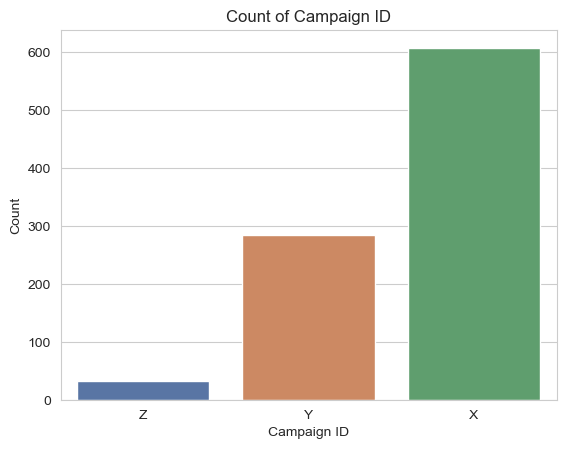

In [6]:
# 각 캠페인별 데이터 행 개수 시각화
sns.countplot(data=ad_campaign, x='xyz_campaign_id')
plt.xlabel('Campaign ID')
plt.ylabel('Count')
plt.title('Count of Campaign ID')
plt.show()

Z 캠페인의 경우 그 수가 너무 적어 우선 제외하고 진행한다.

In [7]:
# ad_campaign의 사본을 저장하고, xyz_campaign_id 열의 값이 Z인 행을 제거
ad_campaign_copy_z = ad_campaign.copy()
ad_campaign = ad_campaign[ad_campaign['xyz_campaign_id'] != 'Z']

In [8]:
# 그룹별로 묶어서 CTR, CR, CPC의 계산
group_df = ad_campaign.groupby(['xyz_campaign_id', 'age', 'gender']).agg({'Impressions': 'sum', 'Clicks': 'sum', 'Join': 'sum', 'Conversion': 'sum', 'Spent': 'sum'})

group_df['CTR'] = (group_df['Clicks'] / group_df['Impressions']) * 100
group_df['CR'] = (group_df['Conversion'] / group_df['Impressions']) * 100
group_df['CPC'] = group_df['Spent'] / group_df['Clicks']

group_df

Impressions  Clicks  Join  Conversion  \
xyz_campaign_id age   gender                                          
X               30-34 F          30393510    4877   494         152   
                      M          35426099    4256   658         237   
                35-39 F          20560068    3929   247          72   
                      M          20334331    2873   268          95   
                40-44 F          22422956    4919   269          80   
                      M          15908704    2492   163          61   
                45-49 F          34969987    8468   308          87   
                      M          24523705    4247   238          82   
Y               30-34 F            907600     183    63          22   
                      M            516765      97    47          19   
                35-39 F            850061     228    40          17   
                      M            195572      46    24          11   
                40-44 F            959402     257    39           8   
                      M            202378      54    23          10   
                45-49 F           3439206     962    77          20   
                      M            685762     150    27           8   

                                     Spent       CTR        CR       CPC  
xyz_campaign_id age   gender                                              
X               30-34 F        7309.559995  0.016046  0.000500  1.498782  
                      M        7464.399991  0.012014  0.000669  1.753853  
                35-39 F        5737.939991  0.019110  0.000350  1.460407  
                      M        4967.420002  0.014129  0.000467  1.729001  
                40-44 F        7019.739983  0.021937  0.000357  1.427066  
                      M        4102.779997  0.015664  0.000383  1.646380  
                45-49 F       11985.169996  0.024215  0.000249  1.415348  
                      M        7063.470003  0.017318  0.000334  1.663167  
Y               30-34 F         250.080000  0.020163  0.002424  1.366557  
                      M         134.910000  0.018771  0.003677  1.390825  
                35-39 F         317.790001  0.026822  0.002000  1.393816  
                      M          64.320000  0.023521  0.005625  1.398261  
                40-44 F         375.710000  0.026788  0.000834  1.461907  
                      M          74.689999  0.026683  0.004941  1.383148  
                45-49 F        1432.929997  0.027972  0.000582  1.489532  
                      M         235.170000  0.021873  0.001167  1.567800

In [9]:
# 그룹 인덱스를 풀고 새로운 인덱스를 만들어 추가 
group_df.reset_index(inplace=True)
group_df['NewIndex'] = group_df['xyz_campaign_id'].astype(str) + '_' + group_df['age'].astype(str) + '_' + group_df['gender'].astype(str)
group_df


,xyz_campaign_id,age,gender,Impressions,Clicks,Join,Conversion,Spent,CTR,CR,CPC,NewIndex
0,X,30-34,F,30393510,4877,494,152,7309.559995,0.016046,0.000500,1.498782,X_30-34_F
1,X,30-34,M,35426099,4256,658,237,7464.399991,0.012014,0.000669,1.753853,X_30-34_M
2,X,35-39,F,20560068,3929,247,72,5737.939991,0.019110,0.000350,1.460407,X_35-39_F
3,X,35-39,M,20334331,2873,268,95,4967.420002,0.014129,0.000467,1.729001,X_35-39_M
4,X,40-44,F,22422956,4919,269,80,7019.739983,0.021937,0.000357,1.427066,X_40-44_F
5,X,40-44,M,15908704,2492,163,61,4102.779997,0.015664,0.000383,1.646380,X_40-44_M
6,X,45-49,F,34969987,8468,308,87,11985.169996,0.024215,0.000249,1.415348,X_45-49_F
7,X,45-49,M,24523705,4247,238,82,7063.470003,0.017318,0.000334,1.663167,X_45-49_M
8,Y,30-34,F,907600,183,63,22,250.080000,0.020163,0.002424,1.366557,Y_30-34_F
9,Y,30-34,M,516765,97,47,19,134.910000,0.018771,0.003677,1.390825,Y_30-34_M


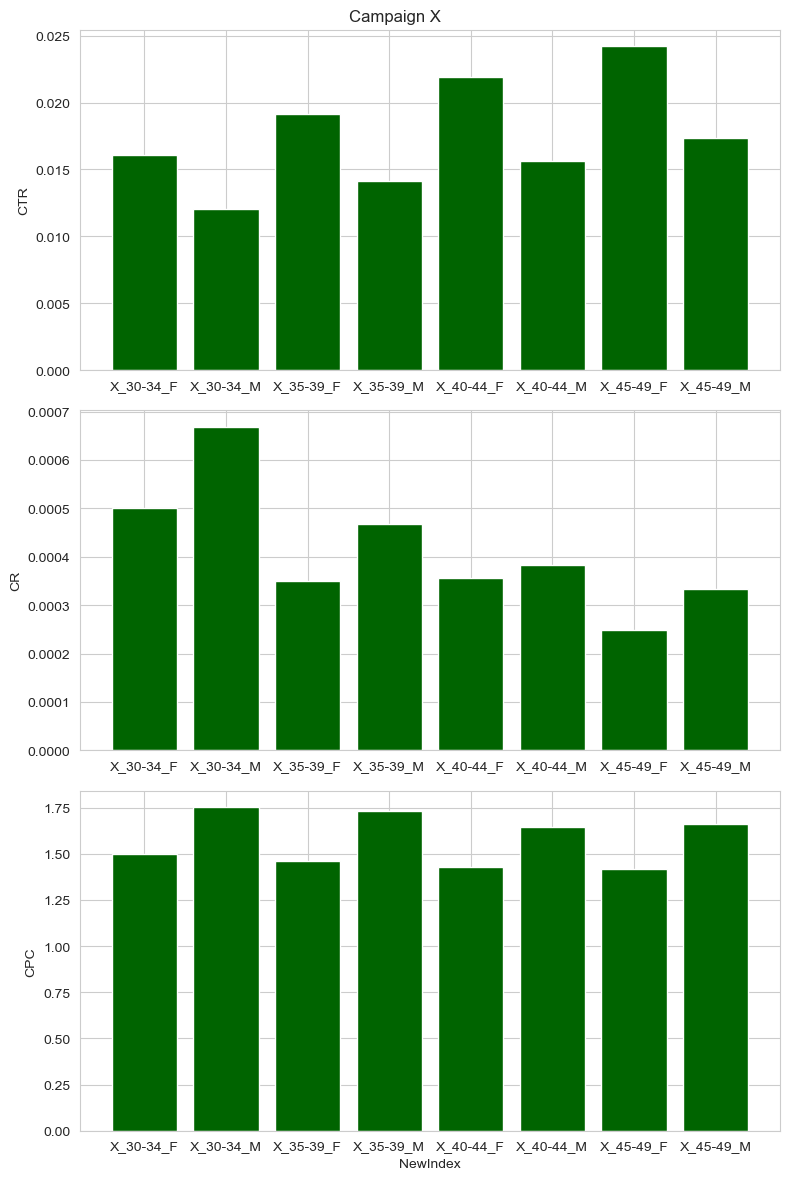

In [44]:
# X 캠페인의 그룹별 CTR, CR, CPC 시각화
campaign_X_data = group_df[group_df['xyz_campaign_id'] == 'X']

fig, axes = plt.subplots(3, 1, figsize=(8, 12))
fig.suptitle('Campaign X')

axes[0].bar(campaign_X_data['NewIndex'], campaign_X_data['CTR'], color='darkgreen')
axes[0].set_ylabel('CTR')

axes[1].bar(campaign_X_data['NewIndex'], campaign_X_data['CR'], color='darkgreen')
axes[1].set_ylabel('CR')

axes[2].bar(campaign_X_data['NewIndex'], campaign_X_data['CPC'], color='darkgreen')
axes[2].set_ylabel('CPC')

axes[2].set_xlabel('NewIndex')
plt.tight_layout()
plt.show()

X 캠페인에서
- CTR의 경우 여성이 남성보다 전반적으로 높고, 나이대가 높을수록 상승하는 경향을 보인다.
- 하지만 CR에서는 남성이 여성보다 전반적으로 높고, 나이대가 높을수록 하락한다. 다시말해 CTR과 경향이 정반대이다.
- CPC의 경우는 남성이 여성보다 모두 약 0.25정도 높고, 나이대는 높아질수록 하락하지만 큰 차이는 없다.

정리
- CTR은 여성이 높지만, CR은 남성이 높다. 다만, CPC는 남성이 더 높기 때문에, 비용 대비 효과는 각 그룹별 고객 가치에 따라 다를 것이다.
- 예를 들어, CTR이 제일 낮지만 CR이 제일 높은 30대 초반 남자 그룹이 비용은 가장 크다. 하지만 고객의 생애 가치를 측정했을때, 비록 가장 낮은 CR을 보이지만 CPC는 가장 저렴한 40대 후반 여자 그룹의 생애가치 더 높다면, 30대 초반 남자 그룹의 비용대비 효과가 더 좋다고 할 수 없다.
- 만약 성별과 나이대를 타겟으로 마케팅 효과를 더 극대화하려면 고객 그룹별 가치를 측정해서 활용해야 한다.

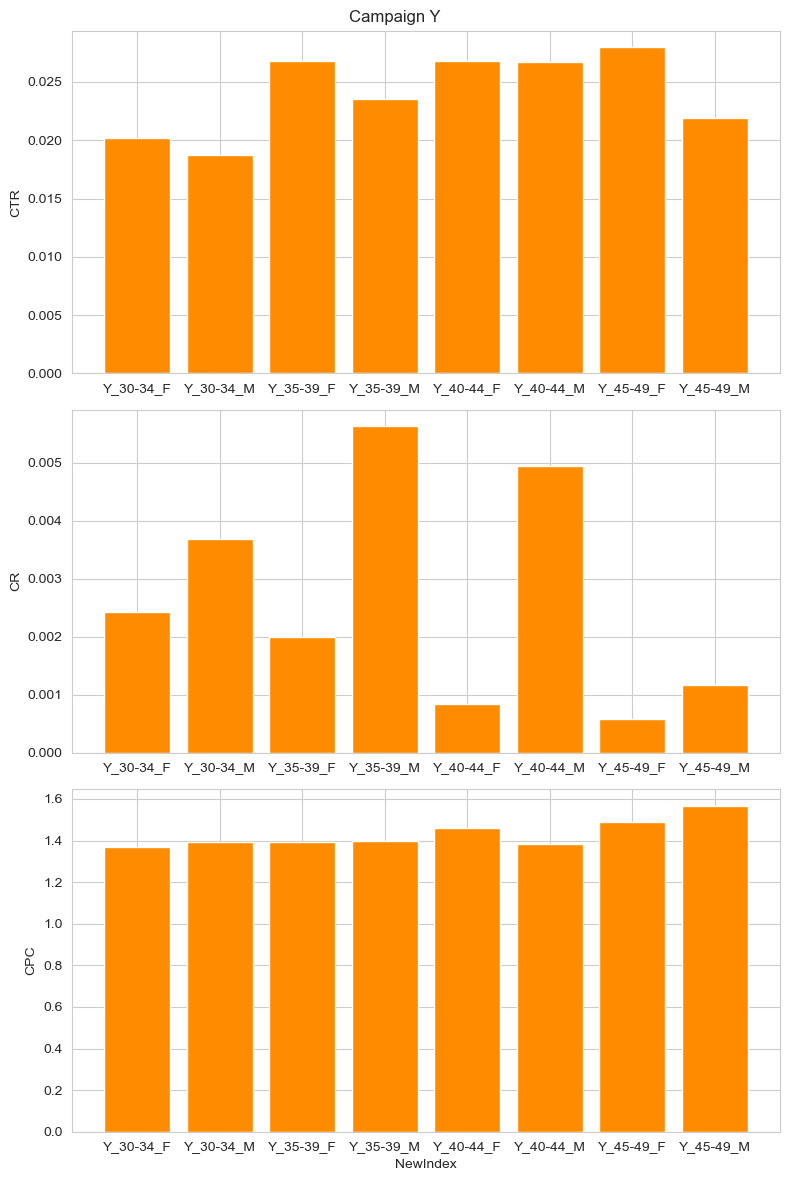

In [43]:
# Y 캠페인의 그룹별 CTR, CR, CPC 시각화
campaign_X_data = group_df[group_df['xyz_campaign_id'] == 'Y']

fig, axes = plt.subplots(3, 1, figsize=(8, 12))
fig.suptitle('Campaign Y')

axes[0].bar(campaign_X_data['NewIndex'], campaign_X_data['CTR'], color='darkorange')
axes[0].set_ylabel('CTR')

axes[1].bar(campaign_X_data['NewIndex'], campaign_X_data['CR'], color='darkorange')
axes[1].set_ylabel('CR')

axes[2].bar(campaign_X_data['NewIndex'], campaign_X_data['CPC'], color='darkorange')
axes[2].set_ylabel('CPC')

axes[2].set_xlabel('NewIndex')
plt.tight_layout()
plt.show()

Y 캠페인
- 40대 여성 그룹, 40대 후반 남성 그룹은 CTR, CPC는 다른 그룹들과 비슷한 수준이지만, CR은 가장 낮다. 
- 만약 이들의 고객 가치가 다른 그룹에 비해 특별히 높지 않다면, 이들을 타겟으로 마케팅을 진행하는 것은 비용 대비 효과가 가장 적을 것으로 예상된다.

In [12]:
Sum_campaign = ad_campaign.groupby('xyz_campaign_id').agg({'Impressions': 'sum', 'Clicks': 'sum', 'Join': 'sum', 'Conversion': 'sum', 'Spent': 'sum'})

Sum_campaign['CTR'] = (Sum_campaign['Clicks'] / Sum_campaign['Impressions']) * 100
Sum_campaign['CR'] = (Sum_campaign['Conversion'] / Sum_campaign['Clicks']) * 100
Sum_campaign['CPC'] = Sum_campaign['Spent'] / Sum_campaign['Clicks']

Sum_campaign

,Impressions,Clicks,Join,Conversion,Spent,CTR,CR,CPC
xyz_campaign_id,,,,,,,,
X,204539360,36061,2645,866,55650.479959,0.017630,2.401486,1.543232
Y,7756746,1977,340,115,2885.599999,0.025487,5.816894,1.459585


X 캠페인과 Y 캠페인 비교
- CTR, CR 모두 Y 캠페인이 더 높다.
- 반면, CPC는 오히려 X 캠페인이 더 높다.
- 따라서, Y 캠페인이 X 캠페인보다 비용 대비 효과가 더 좋은 것으로 보인다.

---

## A/B 테스트

In [47]:
import scipy.stats as stats

# 캠페인 X와 Y에 대한 A/B테스트 가설1 검정
# 가설1 : X 캠페인과 Y 캠페인의 전환율 차이는 통계적으로 유의미할 것이다.
campaign_X_data = ad_campaign[ad_campaign['xyz_campaign_id'] == 'X']
campaign_Y_data = ad_campaign[ad_campaign['xyz_campaign_id'] == 'Y']

conversion_rate_X = campaign_X_data['Conversion'].sum() / campaign_X_data['Clicks'].sum()
conversion_rate_Y = campaign_Y_data['Conversion'].sum() / campaign_Y_data['Clicks'].sum()

# 양쪽 꼬리 가설 검정
t_stat, p_value = stats.ttest_ind(campaign_X_data['Conversion'], campaign_Y_data['Conversion'], equal_var=False)

print(f"X 캠페인의 전환율: {conversion_rate_X}")
print(f"Y 캠페인의 전환율: {conversion_rate_Y}")
print(f"p-value: {p_value}")
if p_value < 0.05:
    print("두 캠페인의 전환율 차이는 통계적으로 유의미합니다.")
else:
    print("두 캠페인의 전환율 차이는 통계적으로 유의미하지 않습니다.")


X 캠페인의 전환율: 0.024014863703169628
Y 캠페인의 전환율: 0.058168942842690946
p-value: 7.652257563602614e-25
두 캠페인의 전환율 차이는 통계적으로 유의미합니다.


In [52]:
# 캠페인 X와 Y에 대한 A/B테스트 가설2 검정
# 가설2 : Y 캠페인의 전환율이 X 캠페인의 전환율보다 2%이상 높을 것이다.

# 전환율 차이 계산
conversion_rate_difference = conversion_rate_Y - conversion_rate_X

# 일원 가설 검정
t_stat, two_tailed_p_value = stats.ttest_ind(campaign_Y_data['Conversion'], campaign_X_data['Conversion'], equal_var=False)
one_tailed_p_value = two_tailed_p_value / 2

print(f"X 캠페인의 전환율: {conversion_rate_X}")
print(f"Y 캠페인의 전환율: {conversion_rate_Y}")
print(f"전환율 차이: {conversion_rate_difference}")
print(f"일원 가설 검정 p-value: {one_tailed_p_value}")
if one_tailed_p_value < 0.05 and conversion_rate_difference > 0.02:
    print("Y 캠페인의 전환율이 X 캠페인보다 2% 이상 높으며, 이 차이는 통계적으로 유의미합니다.")
else:
    print("Y 캠페인의 전환율이 X 캠페인보다 2% 이상 높지 않거나, 이 차이가 통계적으로 유의미하지 않습니다.")

X 캠페인의 전환율: 0.024014863703169628
Y 캠페인의 전환율: 0.058168942842690946
전환율 차이: 0.034154079139521315
일원 가설 검정 p-value: 3.826128781801307e-25
Y 캠페인의 전환율이 X 캠페인보다 2% 이상 높으며, 이 차이는 통계적으로 유의미합니다.


- 앞서 이미 전환율 차이를 확인했기 때문에, 5% 차이에 대한 가설에 대한 검증은 생략할 수 있지만, 처음 계획대로 일단 수행하려 한다.

( 3% 차이에 대한 가설 검증에서 숫자만 바꿈)

In [50]:
# 캠페인 X와 Y에 대한 A/B테스트 가설2 검정
# 가설2 : Y 캠페인의 전환율이 X 캠페인의 전환율보다 3%이상 높을 것이다.

# 전환율 차이 계산
conversion_rate_difference = conversion_rate_Y - conversion_rate_X

# 일원 가설 검정
t_stat, two_tailed_p_value = stats.ttest_ind(campaign_Y_data['Conversion'], campaign_X_data['Conversion'], equal_var=False)
one_tailed_p_value = two_tailed_p_value / 2

print(f"X 캠페인의 전환율: {conversion_rate_X}")
print(f"Y 캠페인의 전환율: {conversion_rate_Y}")
print(f"전환율 차이: {conversion_rate_difference}")
print(f"일원 가설 검정 p-value: {one_tailed_p_value}")
print(f"t-통계량: {t_stat}")
if one_tailed_p_value < 0.05 and conversion_rate_difference > 0.05:
    print("Y 캠페인의 전환율이 X 캠페인보다 5% 이상 높으며, 이 차이는 통계적으로 유의미합니다.")
else:
    print("Y 캠페인의 전환율이 X 캠페인보다 5% 이상 높지 않거나, 이 차이가 통계적으로 유의미하지 않습니다.")

X 캠페인의 전환율: 0.024014863703169628
Y 캠페인의 전환율: 0.058168942842690946
전환율 차이: 0.034154079139521315
일원 가설 검정 p-value: 3.826128781801307e-25
t-통계량: -10.674519055846881
Y 캠페인의 전환율이 X 캠페인보다 5% 이상 높지 않거나, 이 차이가 통계적으로 유의미하지 않습니다.


#### 결론
A/B테스트 결과, Y 캠페인은 전환율을 3% 이상 높일 수 있어 X 캠페인에서 변경하는 것은 타당한 선택으로 보인다.


# 퍼널 시각화

In [16]:
total_sum = ad_campaign[['Clicks', 'Join', 'Conversion']].sum()
total_df = pd.DataFrame(total_sum).T
total_df

,Clicks,Join,Conversion
0,38038,2985,981


In [28]:
# plotly를 사용하여 퍼널 차트 시각화
import plotly.graph_objects as go

fig = go.Figure(data=[go.Funnel(
    y=labels,
    x=values,
    textinfo="value+percent initial",
    marker=dict(color=["deepskyblue", "lightsalmon", "tan", "teal"],)
)])

fig.update_layout(
    title='Marketing Funnel Visualization',
    xaxis_title='Count',
    yaxis_title='Stage'
)

fig.show()